In [1]:
import pandas as pd
import researchpy as rp
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip

In [2]:
df=pd.read_csv(r"C:\ksr\data science\DS_batch1\datasets\insurance.txt")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
rp.summary_cont(df[["charges","age","children","bmi"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,charges,1338.0,13270.422265,12110.011237,331.067454,12620.954034,13919.890496
1,age,1338.0,39.207025,14.049960,0.384102,38.453516,39.960534
2,children,1338.0,1.094918,1.205493,0.032956,1.030266,1.159569
3,bmi,1338.0,30.663397,6.098187,0.166714,30.336347,30.990447


In [5]:
rp.summary_cat(df[["sex","smoker","region"]])

,Variable,Outcome,Count,Percent
0,sex,male,676,50.52
1,,female,662,49.48
2,smoker,no,1064,79.52
3,,yes,274,20.48
4,region,southeast,364,27.20
5,,northwest,325,24.29
6,,southwest,325,24.29
7,,northeast,324,24.22


In [6]:
df["sex"].replace({"female":1,"male":0},inplace=True)
df["smoker"].replace({"no":0,"yes":1},inplace=True)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [8]:
df=pd.get_dummies(df)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [9]:
import statsmodels.formula.api as smf
model=smf.ols("charges~age+bmi+sex+smoker+children+region_northeast+region_northwest+region_southeast+region_southwest",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        06:20:58   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.013e+04    791.569    -12.792      0.000   -1.17e+04   -8572.628
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
sex                131.3144    332.945      0.394      0.693    -521.842     784.470
smoker            2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
children           475.5005    137.804      3.451      0.001     205.163     745.838
region_northeast -1944.3632    334.580     -5.811      0.000   -2600.725   -1288.001
region_northwest -2297.3271    335.065     -6.856      0.000   -2954.641   -1640.014
region_southeast -2979.3852    386.076     -7.717      0.000   -3736.771   -2222.000
region_southwest -2904.4142    352.330     -8.243      0.000   -3595.597   -2213.231
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     2.39e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


# VIF calculations

In [11]:
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)




In [12]:
#Calculating VIF values using that function
vif_cal(input_data=df, dependent_col="charges")

age  VIF =  1.02
sex  VIF =  1.01
bmi  VIF =  1.11
children  VIF =  1.0
smoker  VIF =  1.01
region_northeast  VIF =  inf
region_northwest  VIF =  inf
region_southeast  VIF =  inf
region_southwest  VIF =  inf


C:\Users\Koti\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [13]:
model.resid

0       -8408.789028
1       -1723.050534
2       -2257.526491
3       18229.640447
4       -1725.638186
            ...     
1333    -1750.775386
1334    -1305.950009
1335    -2519.298986
1336      761.360061
1337    -7944.262968
Length: 1338, dtype: float64

Text(0.5, 1.0, 'model residual probablity plot')

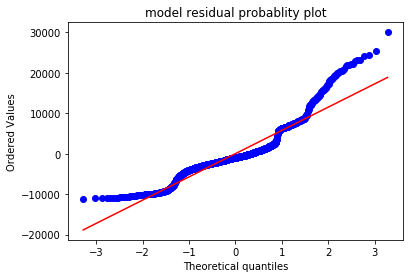

In [14]:
import matplotlib.pyplot as plt
stats.probplot(model.resid,plot=plt)
plt.title("model residual probablity plot")

In [15]:
stats.kstest(model.resid,"norm")

KstestResult(statistic=0.6263077931301486, pvalue=0.0)

In [16]:
name=["lagrange multiplier statstic","p-value","f-value","f p-value"]
test=sms.het_breuschpagan(model.resid,model.model.exog)
lzip(name,test)

[('lagrange multiplier statstic', 121.74360137569016),
 ('p-value', 5.872153354250468e-22),
 ('f-value', 16.628612027375436),
 ('f p-value', 1.1456058246338429e-23)]

In [17]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [18]:
sex_variance_results=stats.levene(df["charges"][df["sex"]==0],df["charges"][df["sex"]==1],center="median")

In [19]:
sex_variance_results

LeveneResult(statistic=9.90925122305512, pvalue=0.0016808765833903443)

In [20]:
import statsmodels.formula.api as smf
model=smf.ols("charges~age+bmi+sex+smoker+children+region_northeast+region_northwest+region_southeast+region_southwest",data=df).fit(cov_type="HC3")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     780.8
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        06:21:46   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.013e+04    840.605    -12.045      0.000   -1.18e+04   -8477.934
age                256.8564     11.961     21.474      0.000     233.412     280.300
bmi                339.1935     31.879     10.640      0.000     276.711     401.676
sex                131.3144    334.971      0.392      0.695    -525.217     787.846
smoker            2.385e+04    578.079     41.255      0.000    2.27e+04     2.5e+04
children           475.5005    131.009      3.630      0.000     218.727     732.274
region_northeast -1944.3632    348.047     -5.587      0.000   -2626.522   -1262.204
region_northwest -2297.3271    340.225     -6.752      0.000   -2964.157   -1630.498
region_southeast -2979.3852    411.335     -7.243      0.000   -3785.587   -2173.183
region_southwest -2904.4142    340.559     -8.528      0.000   -3571.898   -2236.930
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     2.39e+17
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The smallest eigenvalue is 6.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0.5, 1.0, 'model residual probablity plot')

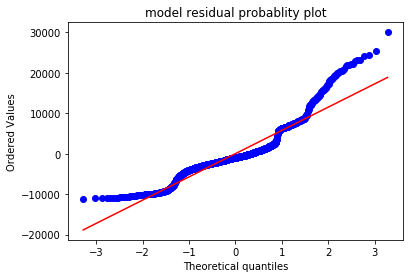

In [21]:
import matplotlib.pyplot as plt
stats.probplot(model.resid,plot=plt)
plt.title("model residual probablity plot")

In [22]:
name=["lagrange multiplier statstic","p-value","f-value","f p-value"]
test=sms.het_breuschpagan(model.resid,model.model.exog)
lzip(name,test)

[('lagrange multiplier statstic', 121.74360137569016),
 ('p-value', 5.872153354250468e-22),
 ('f-value', 16.628612027375436),
 ('f p-value', 1.1456058246338429e-23)]

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([ 1121.8739 ,  1131.5066 ,  1135.9407 , ..., 60021.39897,
         62592.87309, 63770.42801])),
 (10952.462526491305, 13270.422265141258, 0.9028052656368238))

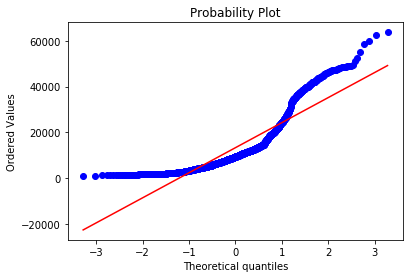

In [23]:
stats.probplot(df["charges"],plot=plt)

In [24]:
stats.shapiro(df["charges"])

(0.814687967300415, 1.150477698013898e-36)

In [27]:
import numpy as np
np.log(df["charges"]).skew()

-0.09009752473024583

In [28]:
df["charges1"]=np.log(df["charges"])

In [29]:
import statsmodels.formula.api as smf
model=smf.ols("charges1~age+bmi+sex+smoker+children+region_northeast+region_northwest+region_southeast+region_southwest",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               charges1   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        06:29:09   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.4941      0.058     94.705      0.000       5.380       5.608
age                  0.0346      0.001     39.655      0.000       0.033       0.036
bmi                  0.0134      0.002      6.381      0.000       0.009       0.017
sex                  0.0754      0.024      3.091      0.002       0.028       0.123
smoker               1.5543      0.030     51.333      0.000       1.495       1.614
children             0.1019      0.010     10.085      0.000       0.082       0.122
region_northeast     1.4610      0.025     59.582      0.000       1.413       1.509
region_northwest     1.3972      0.025     56.899      0.000       1.349       1.445
region_southeast     1.3038      0.028     46.079      0.000       1.248       1.359
region_southwest     1.3321      0.026     51.587      0.000       1.281       1.383
==============================================================================
Omnibus:                      463.882   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1673.760
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                       7.330   Cond. No.                     2.39e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([-1.07186284, -0.94867378, -0.93922444, ...,  2.11614613,
          2.12090253,  2.16636461])),
 (0.4059084880988872, 6.866397550494717e-15, 0.9147397797373163))

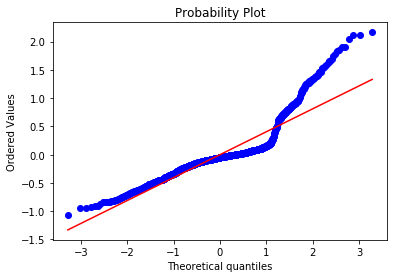

In [30]:
stats.probplot(model.resid,plot=plt)

In [31]:
stats.kstest(model.resid,"norm")

KstestResult(statistic=0.28312027433170495, pvalue=2.1994923355378572e-95)

In [32]:
name=["larger multiplier statstics","p-value","f-value","f p-value"]
test=sms.het_breuschpagan(model.resid,model.model.exog)
list(zip(name,test))

[('larger multiplier statstics', 77.08083156240633),
 ('p-value', 6.128508974723579e-13),
 ('f-value', 10.15533228761325),
 ('f p-value', 7.65075913812259e-14)]